In [53]:
# all imports and dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('life_expectancy.csv')
df = df.drop(["Country","Hepatitis B", "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths", "under-five deaths"], axis=1)
df.head()

,Year,Status,Population,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,2015,Developing,33736494.0,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,2014,Developing,327582.0,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,2013,Developing,31731688.0,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,2012,Developing,3696958.0,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,2011,Developing,2978599.0,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


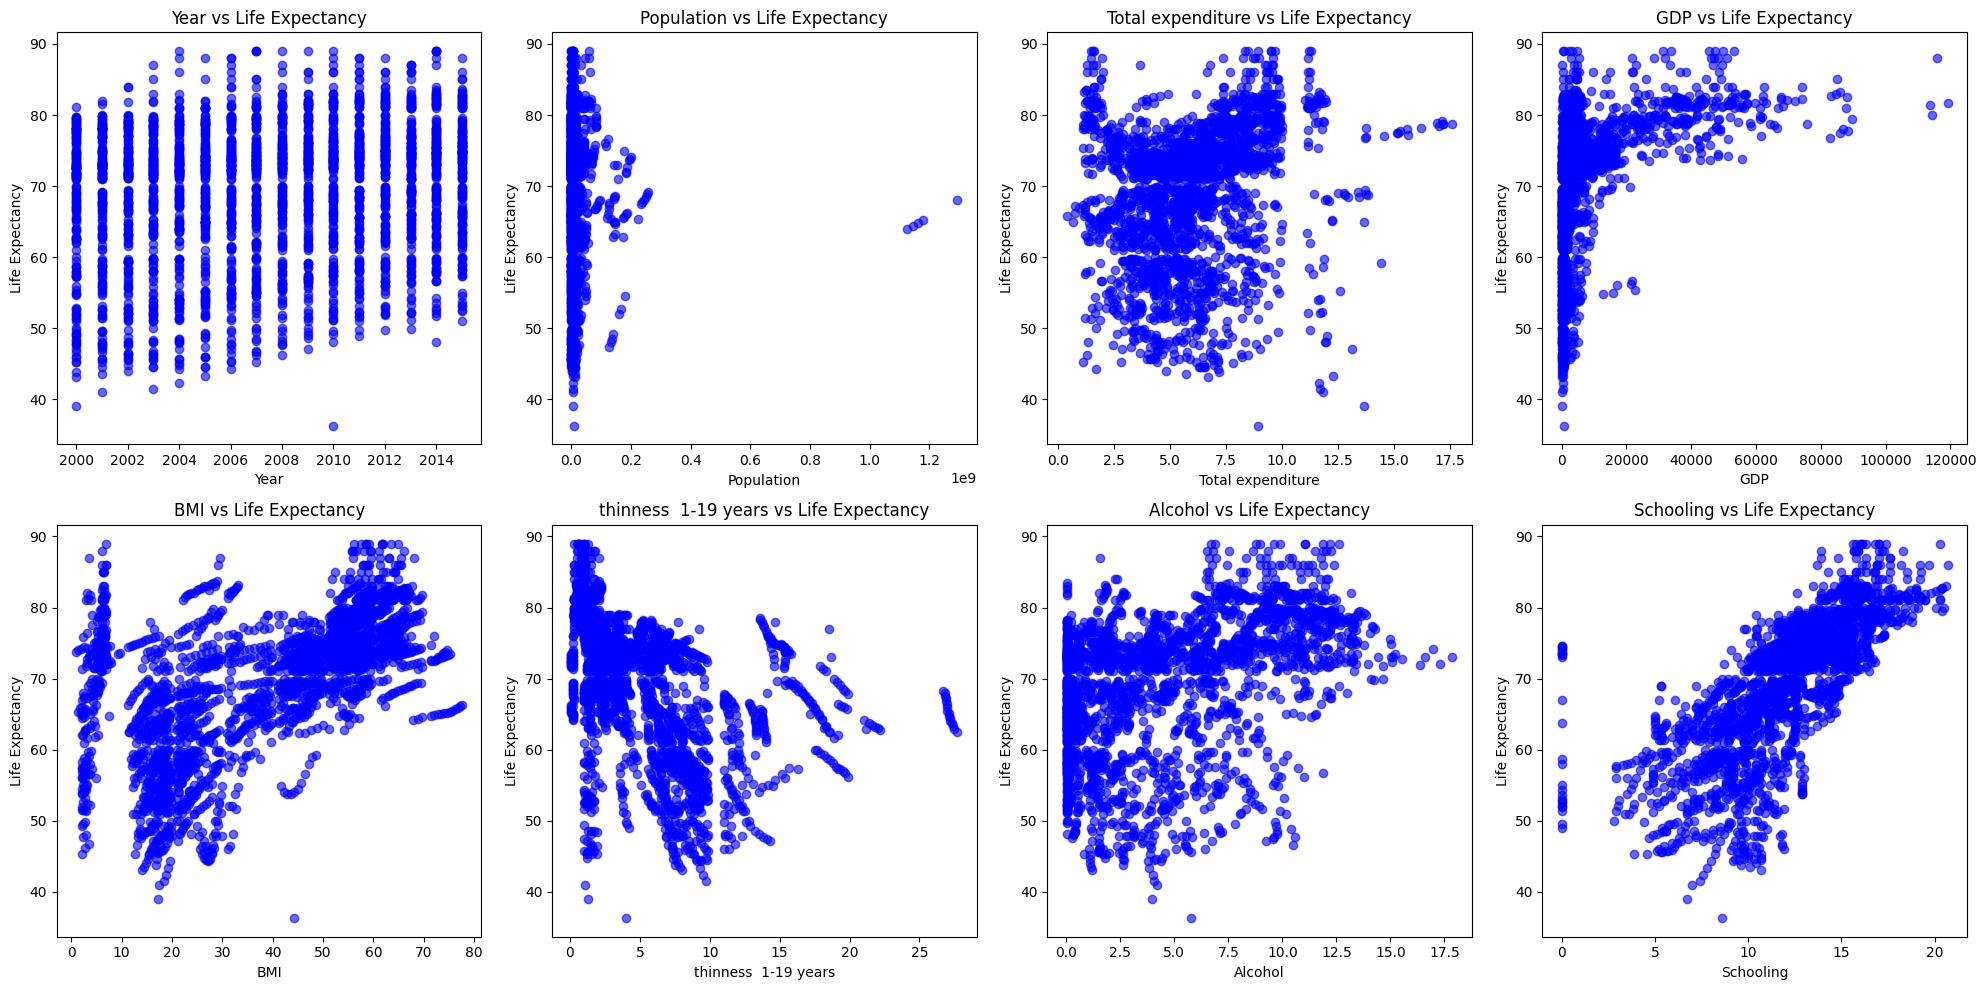

In [45]:
# make subplots relating factors and life expectancy
factors = ['Year', 'Population', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 'Schooling']

# Create subplots: 4 rows, 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plot each factor
for i, factor in enumerate(factors):
    axes[i].scatter(df[factor], df['Life expectancy'], color='blue', alpha=0.6)
    axes[i].set_title(f'{factor} vs Life Expectancy')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Life Expectancy')

# Hide any unused subplots (if there are any)
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Target variable statistics:
count    2026.000000
mean       68.820089
std         9.910989
min        36.300000
25%        62.700000
50%        71.600000
75%        75.575000
max        89.000000
Name: Life expectancy, dtype: float64
Epoch [100/1000], Train Loss: 3135.2339, Test Loss: 3106.2380
Epoch [200/1000], Train Loss: 443.8794, Test Loss: 434.0318
Epoch [300/1000], Train Loss: 169.7780, Test Loss: 172.3386
Epoch [400/1000], Train Loss: 117.0168, Test Loss: 120.9023
Epoch [500/1000], Train Loss: 93.6521, Test Loss: 96.5508
Epoch [600/1000], Train Loss: 80.1570, Test Loss: 82.7725
Epoch [700/1000], Train Loss: 70.1661, Test Loss: 72.8289
Epoch [800/1000], Train Loss: 61.9467, Test Loss: 64.8552
Epoch [900/1000], Train Loss: 54.9720, Test Loss: 58.2811
Epoch [1000/1000], Train Loss: 48.6939, Test Loss: 52.3703


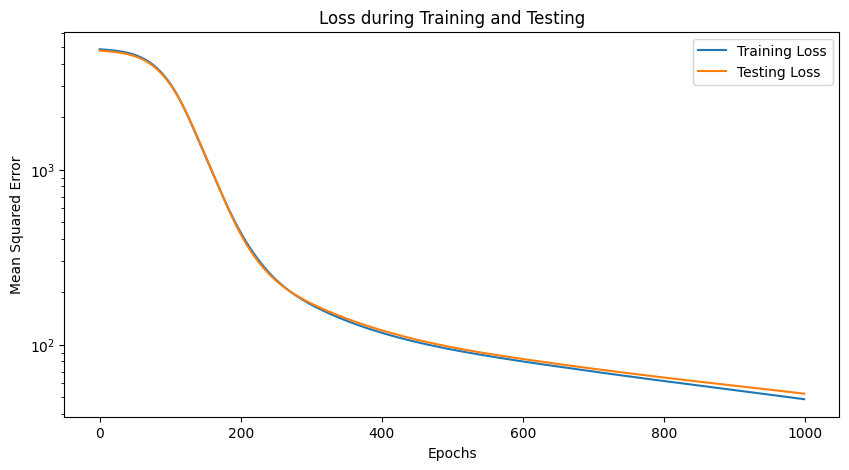

Train RMSE: 6.97
Test RMSE: 7.24


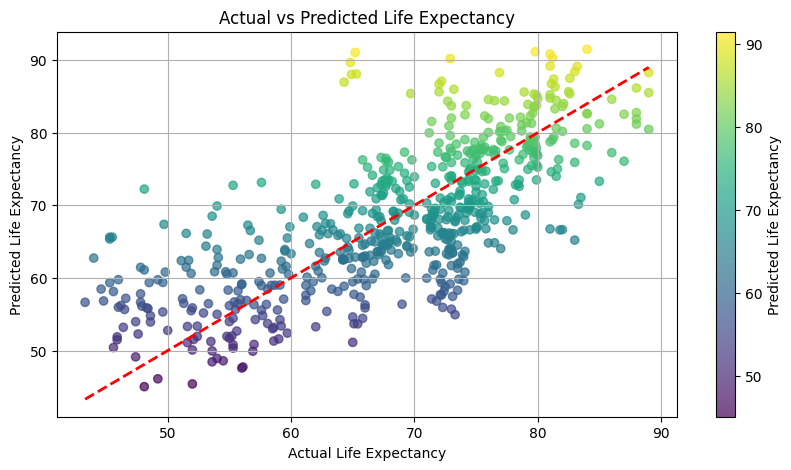

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load and preprocess the data
df = pd.read_csv('life_expectancy.csv')
# Data cleaning
df = df.drop(["Country", "Hepatitis B", "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths", "under-five deaths"], axis=1)
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=["Status"], drop_first=True)

# Split features and target variable
X = df.drop("Life expectancy", axis=1)
y = df["Life expectancy"]

# Print some statistics about the target variable
print("\nTarget variable statistics:")
print(y.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Test the model
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Print epoch statistics
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss during Training and Testing')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor).numpy()
    test_predictions = model(X_test_tensor).numpy()

train_mse = np.mean((train_predictions - y_train.values.reshape(-1, 1))**2)
test_mse = np.mean((test_predictions - y_test.values.reshape(-1, 1))**2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


# Plot actual vs predicted values with color-coded dots
plt.figure(figsize=(10, 5))
scatter = plt.scatter(y_test, test_predictions, c=test_predictions, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Predicted Life Expectancy')  # Add a color bar for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.grid(True)
plt.show()



In [100]:
# Define a threshold to convert regression outputs into binary classification
threshold = 60

# Convert the predicted and actual values to binary classes
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)
y_train_class = (y_train.values >= threshold).astype(int)
y_test_class = (y_test.values >= threshold).astype(int)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_class, test_predictions_class)
print(f"Confusion Matrix:\n{conf_matrix}")

# True positive (TP), True negative (TN), False positive (FP), False negative (FN)
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(y_test_class, test_predictions_class)
# Precision (TP / (TP + FP))
precision = precision_score(y_test_class, test_predictions_class)
# Recall (TP / (TP + FN))
recall = recall_score(y_test_class, test_predictions_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[ 94  43]
 [ 43 428]]
Accuracy: 0.8586
Precision: 0.9087
Recall: 0.9087



Target variable statistics:
count    2026.000000
mean       68.820089
std         9.910989
min        36.300000
25%        62.700000
50%        71.600000
75%        75.575000
max        89.000000
Name: Life expectancy, dtype: float64
Epoch [100/1000], Train Loss: 263.9754, Test Loss: 237.6815
Epoch [200/1000], Train Loss: 93.1537, Test Loss: 95.5631
Epoch [300/1000], Train Loss: 67.9492, Test Loss: 71.1027
Epoch [400/1000], Train Loss: 51.3604, Test Loss: 54.4961
Epoch [500/1000], Train Loss: 39.4549, Test Loss: 42.5235
Epoch [600/1000], Train Loss: 30.9070, Test Loss: 33.8677
Epoch [700/1000], Train Loss: 25.0947, Test Loss: 28.3568
Epoch [800/1000], Train Loss: 21.4644, Test Loss: 25.2149
Epoch [900/1000], Train Loss: 19.2361, Test Loss: 23.4735
Epoch [1000/1000], Train Loss: 17.7879, Test Loss: 22.4984


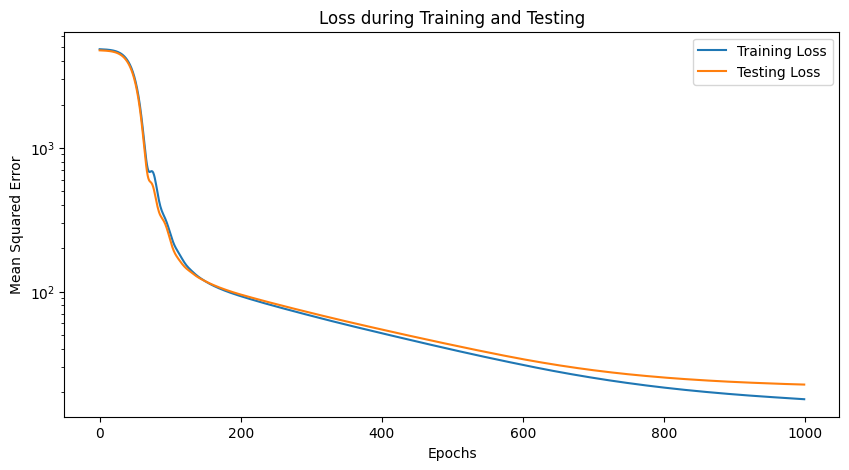

Train RMSE: 4.22
Test RMSE: 4.74


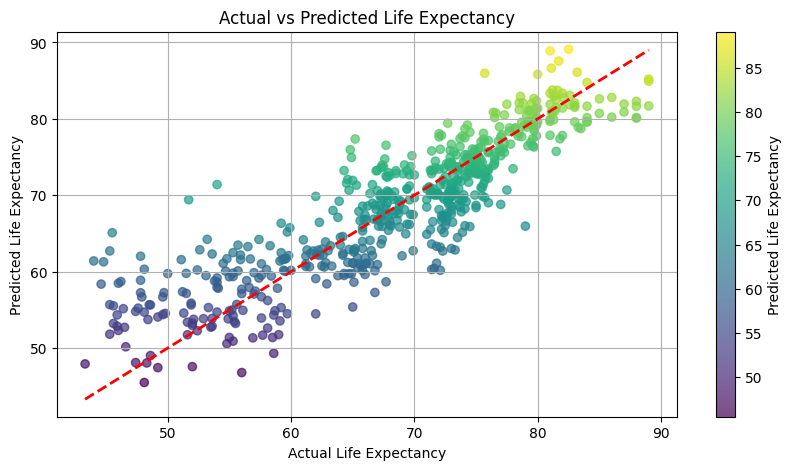

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('life_expectancy.csv')
# Data cleaning
df = df.drop(["Country", "Hepatitis B", "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths", "under-five deaths"], axis=1)
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=["Status"], drop_first=True)

# Split features and target variable
X = df.drop("Life expectancy", axis=1)
y = df["Life expectancy"]

# Print some statistics about the target variable
print("\nTarget variable statistics:")
print(y.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Define a more complex feedforward neural network
class ComplexNN(nn.Module):
    def __init__(self, input_size):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Increased size
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)  # New layer
        self.fc5 = nn.Linear(16, 1)   # Final output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))  # Activation for new layer
        x = self.fc5(x)
        return x

# Initialize model, loss function, and optimizer
input_size = X_train.shape[1]
model = ComplexNN(input_size)  # Updated model class
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Test the model
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Print epoch statistics
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss during Training and Testing')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor).numpy()
    test_predictions = model(X_test_tensor).numpy()

train_mse = np.mean((train_predictions - y_train.values.reshape(-1, 1))**2)
test_mse = np.mean((test_predictions - y_test.values.reshape(-1, 1))**2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Plot actual vs predicted values with color-coded dots
plt.figure(figsize=(10, 5))
scatter = plt.scatter(y_test, test_predictions, c=test_predictions, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Predicted Life Expectancy')  # Add a color bar for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.grid(True)
plt.show()

In [102]:
# Define a threshold to convert regression outputs into binary classification
threshold = 60

# Convert the predicted and actual values to binary classes
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)
y_train_class = (y_train.values >= threshold).astype(int)
y_test_class = (y_test.values >= threshold).astype(int)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_class, test_predictions_class)
print(f"Confusion Matrix:\n{conf_matrix}")

# True positive (TP), True negative (TN), False positive (FP), False negative (FN)
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(y_test_class, test_predictions_class)
# Precision (TP / (TP + FP))
precision = precision_score(y_test_class, test_predictions_class)
# Recall (TP / (TP + FN))
recall = recall_score(y_test_class, test_predictions_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[ 94  43]
 [ 43 428]]
Accuracy: 0.8586
Precision: 0.9087
Recall: 0.9087



Target variable statistics:
count    2026.000000
mean       68.820089
std         9.910989
min        36.300000
25%        62.700000
50%        71.600000
75%        75.575000
max        89.000000
Name: Life expectancy, dtype: float64
Epoch [100/1000], Train Loss: 245.9741, Test Loss: 210.2044
Epoch [200/1000], Train Loss: 97.2393, Test Loss: 98.2211
Epoch [300/1000], Train Loss: 68.9075, Test Loss: 70.8517
Epoch [400/1000], Train Loss: 50.8126, Test Loss: 53.2630
Epoch [500/1000], Train Loss: 38.4813, Test Loss: 41.3325
Epoch [600/1000], Train Loss: 30.3529, Test Loss: 33.5280
Epoch [700/1000], Train Loss: 25.0272, Test Loss: 28.5712
Epoch [800/1000], Train Loss: 21.5039, Test Loss: 25.5065
Epoch [900/1000], Train Loss: 19.2391, Test Loss: 23.6973
Epoch [1000/1000], Train Loss: 17.7046, Test Loss: 22.5829


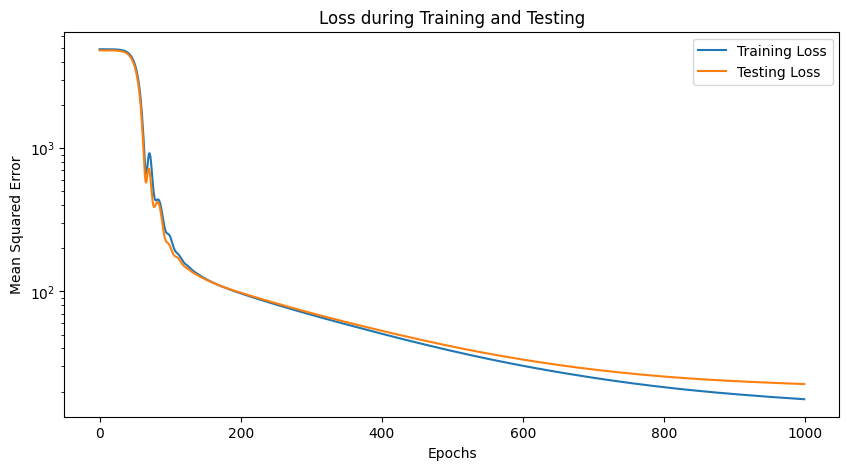

Train RMSE: 4.21
Test RMSE: 4.75


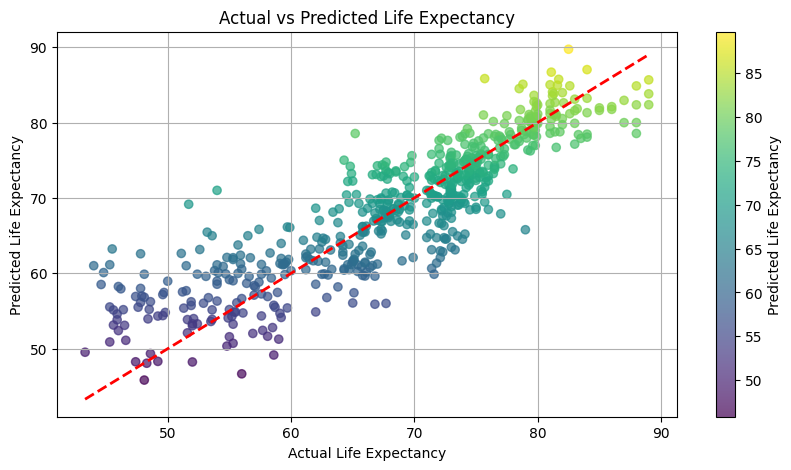

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('life_expectancy.csv')
# Data cleaning
df = df.drop(["Country", "Hepatitis B", "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths", "under-five deaths"], axis=1)
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=["Status"], drop_first=True)

# Split features and target variable
X = df.drop("Life expectancy", axis=1)
y = df["Life expectancy"]

# Print some statistics about the target variable
print("\nTarget variable statistics:")
print(y.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Define a deeper feedforward neural network
class DeeperNN(nn.Module):
    def __init__(self, input_size):
        super(DeeperNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # Increased size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 8)  # New layer
        self.fc7 = nn.Linear(8, 1)   # Final output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))  # Activation for new layer
        x = self.fc7(x)
        return x

# Initialize the updated model
input_size = X_train.shape[1]
model = DeeperNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Test the model
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Print epoch statistics
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss during Training and Testing')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor).numpy()
    test_predictions = model(X_test_tensor).numpy()

train_mse = np.mean((train_predictions - y_train.values.reshape(-1, 1))**2)
test_mse = np.mean((test_predictions - y_test.values.reshape(-1, 1))**2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Plot actual vs predicted values with color-coded dots
plt.figure(figsize=(10, 5))
scatter = plt.scatter(y_test, test_predictions, c=test_predictions, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Predicted Life Expectancy')  # Add a color bar for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.grid(True)
plt.show()

In [110]:
# Define a threshold to convert regression outputs into binary classification
threshold = 60

# Convert the predicted and actual values to binary classes
train_predictions_class = (train_predictions >= threshold).astype(int)
test_predictions_class = (test_predictions >= threshold).astype(int)
y_train_class = (y_train.values >= threshold).astype(int)
y_test_class = (y_test.values >= threshold).astype(int)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_class, test_predictions_class)
print(f"Confusion Matrix:\n{conf_matrix}")

# True positive (TP), True negative (TN), False positive (FP), False negative (FN)
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(y_test_class, test_predictions_class)
# Precision (TP / (TP + FP))
precision = precision_score(y_test_class, test_predictions_class)
# Recall (TP / (TP + FN))
recall = recall_score(y_test_class, test_predictions_class)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[ 98  39]
 [ 15 456]]
Accuracy: 0.9112
Precision: 0.9212
Recall: 0.9682
